In [1]:
# Social Network Ads Prediction - Classification Model
# 1. Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# 2. Loading Dataset
data = pd.read_csv("C:\\Users\\USER\\Desktop\\Jaci\\Social_Network_Ads.csv")

In [3]:

# 3. Exploratory Data Analysis
print("First 5 rows:")
print(data.head())
print("\nDataset info:")
print(data.info())
print("\nClass distribution:")
print(data['Purchased'].value_counts())

First 5 rows:
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None

Class distribution:
Purchased
0    257
1    143
Name: count, dtype: int64


In [4]:
# 4. Data Preprocessing
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

In [5]:

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature Scaling
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)


In [6]:
# 5. Model Training
classifier = LogisticRegression()
classifier.fit(X_train_scaled, y_train)

LogisticRegression()

In [7]:
# 6. Model Prediction
y_pred = classifier.predict(X_test_scaled)

In [8]:
# 7. Evaluation
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[65  3]
 [ 8 24]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100

Accuracy Score: 0.89


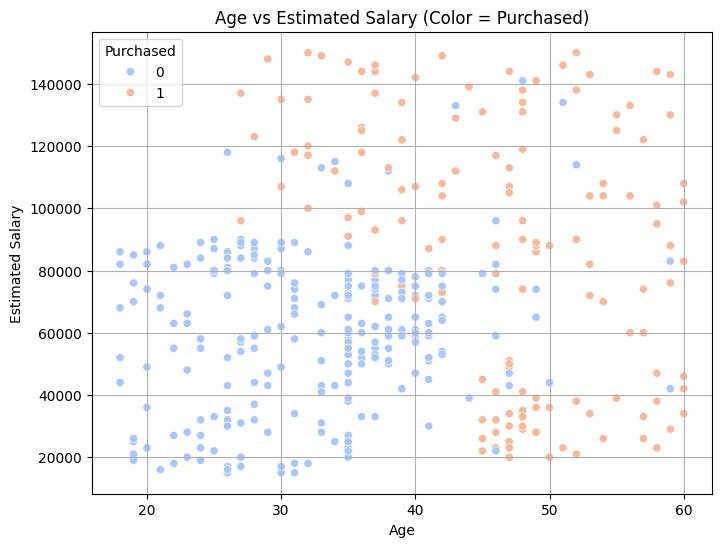

In [9]:
# 8. Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=data, palette='coolwarm')
plt.title("Age vs Estimated Salary (Color = Purchased)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.grid(True)
plt.show()